In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('iris_svm.csv')

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
print(df['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


In [6]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

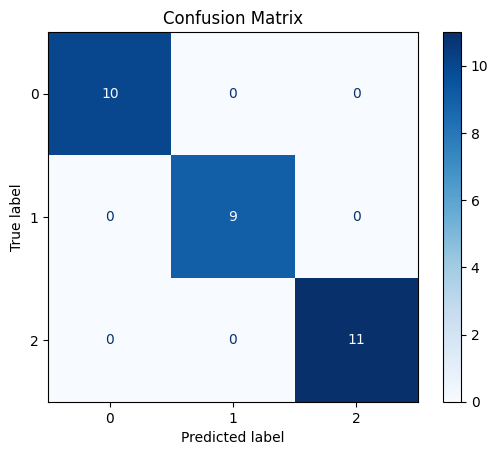

In [13]:
cm = confusion_matrix(y_test, y_pred)
d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
d.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [14]:
new_data = pd.DataFrame({
    'sepal length (cm)': [5.5],
    'sepal width (cm)': [3.0],
    'petal length (cm)': [4.2],
    'petal width (cm)': [1.3]
})

predicted_species = svm_classifier.predict(new_data)
predicted_species

array([1])

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

with open("iris_model.sav", "wb") as f:
    pickle.dump((model, scaler), f)

with open("iris_model.sav", "rb") as f:
    loaded_model, loaded_scaler = pickle.load(f)

